In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os

In [2]:
img_lista  ="C:\\Users\\kika_\\OneDrive\\Área de Trabalho\\dados\\all_resized_into_sub_folders_640/"

In [3]:
rotulo = ['Black bishop','Black king','Black knight','Black pawn','Black queen','Black rook','White bishop','White king','White knight','White pawn','White queen','White rook']

In [4]:
img_lista

'C:\\Users\\kika_\\OneDrive\\Área de Trabalho\\dados\\all_resized_into_sub_folders_640/'

In [5]:
# lista de dicionários
data = [{"C:\\Users\\kika_\\OneDrive\\Área de Trabalho\\dados\\all_resized_into_sub_folders_640\\Black bishop": os.path.join(img_lista, folder), "Black bishop": folder} for folder in os.listdir(img_lista) if os.path.isdir(os.path.join(img_lista, folder))]

# Converte a lista em um DataFrame
df1 = pd.DataFrame(data)

# Exibe o DataFrame
print(df1)

   C:\Users\kika_\OneDrive\Área de Trabalho\dados\all_resized_into_sub_folders_640\Black bishop  \
0   C:\Users\kika_\OneDrive\Área de Trabalho\dados...                                             
1   C:\Users\kika_\OneDrive\Área de Trabalho\dados...                                             
2   C:\Users\kika_\OneDrive\Área de Trabalho\dados...                                             
3   C:\Users\kika_\OneDrive\Área de Trabalho\dados...                                             
4   C:\Users\kika_\OneDrive\Área de Trabalho\dados...                                             
5   C:\Users\kika_\OneDrive\Área de Trabalho\dados...                                             
6   C:\Users\kika_\OneDrive\Área de Trabalho\dados...                                             
7   C:\Users\kika_\OneDrive\Área de Trabalho\dados...                                             
8   C:\Users\kika_\OneDrive\Área de Trabalho\dados...                                             
9   C:\Use

In [6]:
print(df1.columns)

Index(['C:\Users\kika_\OneDrive\Área de Trabalho\dados\all_resized_into_sub_folders_640\Black bishop', 'Black bishop'], dtype='object')


In [7]:
# Reorganiza as colunas
df1 = df1[['C:\\Users\\kika_\\OneDrive\\Área de Trabalho\\dados\\all_resized_into_sub_folders_640\\Black bishop', 'Black bishop']]

# Renomea as colunas
df1.rename(columns={
    'C:\\Users\\kika_\\OneDrive\\Área de Trabalho\\dados\\all_resized_into_sub_folders_640\\Black bishop': 'Caminho',
    'Black bishop': 'folder'
}, inplace=True)

# Exibe o DataFrame
print(df1)

                                              Caminho        folder
0   C:\Users\kika_\OneDrive\Área de Trabalho\dados...  Black bishop
1   C:\Users\kika_\OneDrive\Área de Trabalho\dados...    Black king
2   C:\Users\kika_\OneDrive\Área de Trabalho\dados...  Black knight
3   C:\Users\kika_\OneDrive\Área de Trabalho\dados...    Black pawn
4   C:\Users\kika_\OneDrive\Área de Trabalho\dados...   Black queen
5   C:\Users\kika_\OneDrive\Área de Trabalho\dados...    Black rook
6   C:\Users\kika_\OneDrive\Área de Trabalho\dados...  White bishop
7   C:\Users\kika_\OneDrive\Área de Trabalho\dados...    White king
8   C:\Users\kika_\OneDrive\Área de Trabalho\dados...  White knight
9   C:\Users\kika_\OneDrive\Área de Trabalho\dados...    White pawn
10  C:\Users\kika_\OneDrive\Área de Trabalho\dados...   White queen
11  C:\Users\kika_\OneDrive\Área de Trabalho\dados...    White rook


In [8]:
df1['folder'].value_counts()

folder
Black bishop    1
Black king      1
Black knight    1
Black pawn      1
Black queen     1
Black rook      1
White bishop    1
White king      1
White knight    1
White pawn      1
White queen     1
White rook      1
Name: count, dtype: int64

In [9]:
# Cria a iteração entre rótulo e imagem e armazena o Caminho e o Rótulo

img_list = []
label_list = []

for label in rotulo:
    for img_file in os.listdir(os.path.join(img_lista, label)):
        img_list.append(os.path.join(img_lista, label, img_file))
        label_list.append(label)
        
df1 = pd.DataFrame({'img': img_list, 'label': label_list})

In [10]:
from PIL import Image
import numpy as np

In [11]:
# lendo o Dataframe

df1.head()

,img,label
0,C:\Users\kika_\OneDrive\Área de Trabalho\dados...,Black bishop
1,C:\Users\kika_\OneDrive\Área de Trabalho\dados...,Black bishop
2,C:\Users\kika_\OneDrive\Área de Trabalho\dados...,Black bishop
3,C:\Users\kika_\OneDrive\Área de Trabalho\dados...,Black bishop
4,C:\Users\kika_\OneDrive\Área de Trabalho\dados...,Black bishop


In [12]:
df1.dtypes


img      object
label    object
dtype: object

In [13]:
# Procurando Valores Nulos
df1.isnull().sum()

img      0
label    0
dtype: int64

In [14]:
# Verificando o tamanho das imagens

plt.imread(df1['img'][0]).shape

(640, 640, 3)

In [15]:
# Listas para armazenar os valores dos pixels de cada canal

red_values = []
green_values = []
blue_values = []

# Iterar sobre as imagens do DataFrame

for index, row in df1.iterrows():
    img_path = row['img']
    img = Image.open(img_path)
    
    if img is not None:
        # Converter a imagem para RGB 
        img = img.convert('RGB')
        
        # Obter os canais
        red_channel, green_channel, blue_channel = img.split()
        
        # Adicionar os valores dos pixels às respectivas listas
        red_values.extend(np.array(red_channel).ravel())
        green_values.extend(np.array(green_channel).ravel())
        blue_values.extend(np.array(blue_channel).ravel())




In [16]:
# Calcula média e desvio padrão para cada canal

red_mean = np.mean(red_values)
red_std = np.std(red_values)

green_mean = np.mean(green_values)
green_std = np.std(green_values)

blue_mean = np.mean(blue_values)
blue_std = np.std(blue_values)

print(f"Red Channel - Mean: {red_mean}, Std Dev: {red_std}")
print(f"Green Channel - Mean: {green_mean}, Std Dev: {green_std}")
print(f"Blue Channel - Mean: {blue_mean}, Std Dev: {blue_std}")



Red Channel - Mean: 116.96116814778645, Std Dev: 90.24465874713466
Green Channel - Mean: 141.98433564453126, Std Dev: 58.96530395299627
Blue Channel - Mean: 120.85627466634115, Std Dev: 73.10669710024972


In [17]:
# Esta função calcula estatísticas para os canais de cor Vermelho, Verde e Azul (RGB) de um conjunto de imagens.
# Segmenta as peças brancas e pretas
# Calcula as estatíticas por segmentação

def compute_channel_stats(img_list):
    red_values = []
    green_values = []
    blue_values = []

    for img_path in img_list:
        img = Image.open(img_path)
        if img is not None:
            img = img.convert('RGB')
            red_channel, green_channel, blue_channel = img.split()
            red_values.extend(np.array(red_channel).ravel())
            green_values.extend(np.array(green_channel).ravel())
            blue_values.extend(np.array(blue_channel).ravel())

    return {
        'red_mean': np.mean(red_values),
        'green_mean': np.mean(green_values),
        'blue_mean': np.mean(blue_values),
        'red_std': np.std(red_values),
        'green_std': np.std(green_values),
        'blue_std': np.std(blue_values)
    }

# Segmentar o DataFrame

white_pieces = df1[df1['label'].str.contains('White')] 
black_pieces = df1[df1['label'].str.contains('Black')]

# Calcular estatísticas

white_stats = compute_channel_stats(white_pieces['img'].tolist())
black_stats = compute_channel_stats(black_pieces['img'].tolist())



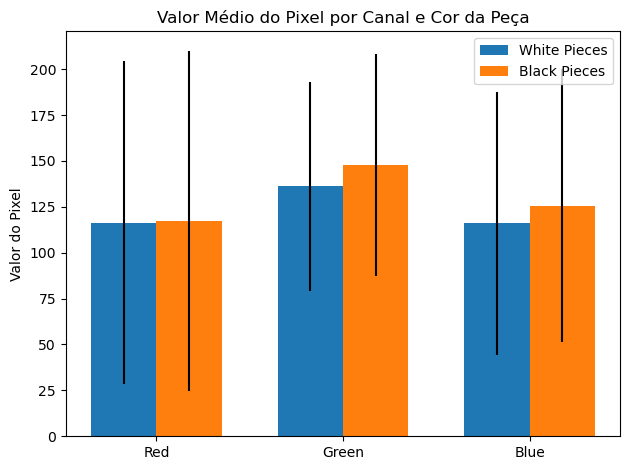

In [18]:
# Gráfico dos resultados

labels = ['Red', 'Green', 'Blue']
white_means = [white_stats['red_mean'], white_stats['green_mean'], white_stats['blue_mean']]
black_means = [black_stats['red_mean'], black_stats['green_mean'], black_stats['blue_mean']]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, white_means, width, label='White Pieces', yerr=[white_stats['red_std'], white_stats['green_std'], white_stats['blue_std']])
rects2 = ax.bar(x + width/2, black_means, width, label='Black Pieces', yerr=[black_stats['red_std'], black_stats['green_std'], black_stats['blue_std']])

ax.set_ylabel('Valor do Pixel')
ax.set_title('Valor Médio do Pixel por Canal e Cor da Peça')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

In [19]:
# plotar um gráfico com  a distribuição dos valores dos pixels para cada canal 
# Vamos selecionar aleatoriamente uma porcentagem das suas imagens (30%).
# Para essa amostra, vamos calcular a distribuição dos valores dos pixels para cada canal.

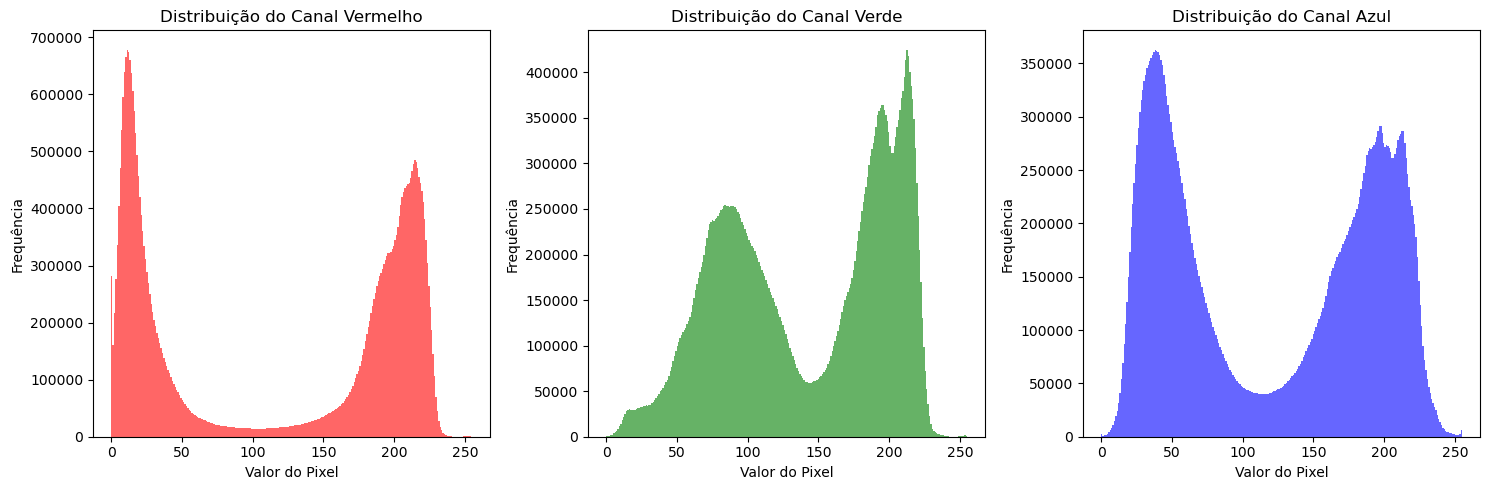

In [20]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random

# Selecionar uma amostra de 30% das imagens
sample_size = int(0.30 * len(df1))
sample_images = random.sample(df1['img'].tolist(), sample_size)

red_values = []
green_values = []
blue_values = []

# Iterar sobre as imagens da amostra
for img_path in sample_images:
    img = Image.open(img_path)
    
    if img is not None:
        img = img.convert('RGB')
        red_channel, green_channel, blue_channel = img.split()
        
        red_values.extend(np.array(red_channel).ravel())
        green_values.extend(np.array(green_channel).ravel())
        blue_values.extend(np.array(blue_channel).ravel())

# Plotar histogramas
plt.figure(figsize=(15, 5))

# Histograma para o canal vermelho
plt.subplot(1, 3, 1)
plt.hist(red_values, bins=256, color='red', alpha=0.6)
plt.title('Distribuição do Canal Vermelho')
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')

# Histograma para o canal verde
plt.subplot(1, 3, 2)
plt.hist(green_values, bins=256, color='green', alpha=0.6)
plt.title('Distribuição do Canal Verde')
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')

# Histograma para o canal azul
plt.subplot(1, 3, 3)
plt.hist(blue_values, bins=256, color='blue', alpha=0.6)
plt.title('Distribuição do Canal Azul')
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


In [21]:
print('Esta análise foi realizada por: Vânia Jesus')

Esta análise foi realizada por: Vânia Jesus
